特鲁普效应是著名的心理学现象，展示了人们对事物的认知过程已是一个自动化的历程。当有一个新的刺激出现时，如果它的特征和原先的刺激相似或符合一致，便会加速人们的认知；反之，若新的刺激特征与原先的刺激不相同，则会干扰人们的认知，使人们的所需的反映数据变长。

简单来说，斯特鲁普效应是当有与原有认知不同的情况出现时，人们的反应时间会较长。

我们想要验证斯特鲁普效应。

 # 实验设计

通过网上的stroop实验做测试人的反应时间（https://faculty.washington.edu/chudler/java/ready.html）。
每名参与者得到两组有颜色的文字，第一组数据是字体内容和字体颜色一致，第二组数据是字体内容和字体颜色不一致。每名参与者对每组文字说出文字的颜色，并分别统计完成每组的时间。

此次实验共记录24组数据（样本量），并汇总到Excel表格中。

# 一、描述统计分析

In [1]:
#导入包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
'''
路径和文件名中不要用中文，不然会报错
encoding用于指定文件的编码，因为读取的csv中有中文，所以指定文件编码为中文编码“GBK”
'''
data = pd.read_csv('斯特鲁普数据集.csv',
                   encoding = 'GBK')
data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


观察数据结果：“一致”列是（第一组数据）字体内容和字体颜色一致情况下，实验者的反应时间（单位：秒）。“不一致”列是（第二组数据）字体内容和字体颜色不一致情况下，实验者的反应时间。

In [4]:
#获取描述统计信息
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,13.926875,22.350750
std,3.540219,5.010218
min,8.630000,15.687000
25%,11.895250,18.716750
50%,13.627500,21.046000
75%,15.671250,24.536000
max,22.328000,35.255000


In [6]:
'''
第一组数据：字体内容和字体颜色一致情况下，实验者的反应时间
'''
#第一组数据均值
con1_mean = data['Congruent'].mean()
# 第一组数据标准差
con1_std = data['Congruent'].std()

'''
第一组数据：字体内容和字体颜色一致情况下，实验者的反应时间
'''
# 第二组数据均值
con2_mean = data['Incongruent'].mean()
# 第二组数据标准差
con2_std = data['Incongruent'].std()

使用柱状图对两个样本数据进行比较

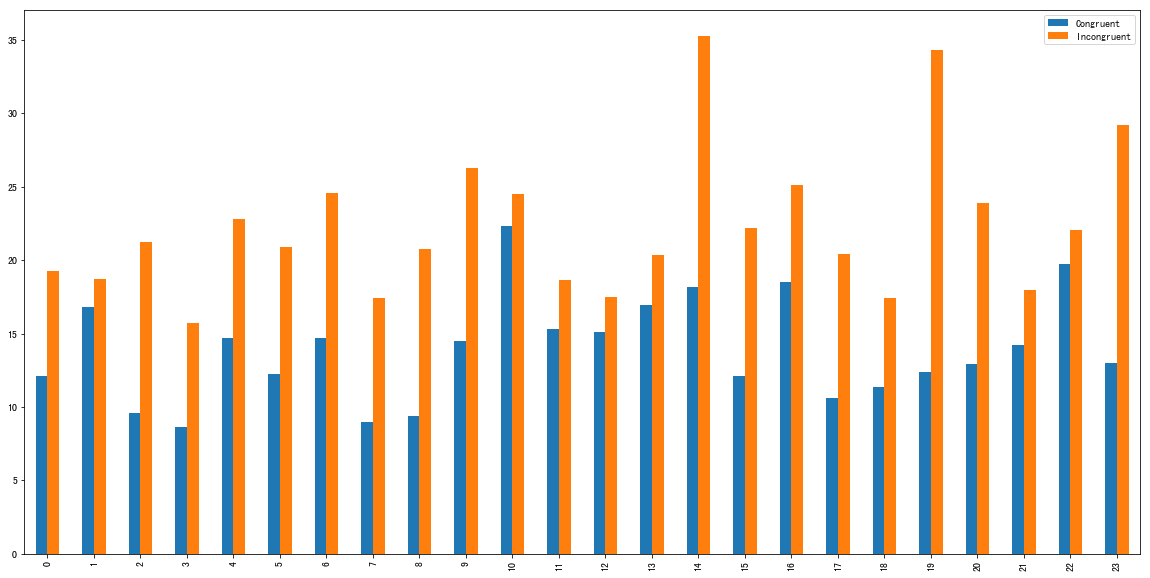

In [7]:
#两个样本数据集对比
#画板
fg = plt.figure(figsize = (20,10))
#画纸
ax = fg.add_subplot(1,1,1)
#绘制柱状图
data.plot(kind = 'bar',ax = ax)
#显示图形
plt.show()

In [8]:
print('描述统计分析结果：')
print('第一组数据：字体内容和字体颜色一致情况下，实验者的平均反应时间是:',con1_mean,'秒,标准差是',con1_std,'秒')
print('第二组数据：字体内容和字体颜色不一致情况下，实验者的平均反应时间是:',con2_mean,'秒,标准差是',con2_std,'秒')
print('“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体验证不一致时，实验者的平均反应时间变长')

描述统计分析结果：
第一组数据：字体内容和字体颜色一致情况下，实验者的平均反应时间是: 13.926875 秒,标准差是 3.5402194271529703 秒
第二组数据：字体内容和字体颜色不一致情况下，实验者的平均反应时间是: 22.350749999999994 秒,标准差是 5.010217727196399 秒
“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体验证不一致时，实验者的平均反应时间变长


# 二、推论统计分析

进行假设检验

## 1.问题是什么？

自变量是指原因。因变量是指结果，也就是自变量发生变化导致改变的值就是因变量。

自变量：我们有两组实验数据，第一组是字体内容和颜色一致。第二组数据值是字体内容和颜色不一致。所以自变量是实验数据的颜色和文字是否相同

因变量：实验者的反应时间

所以，我们要考察的是自变量（字体内容和颜色是否相同）两种情况下对因变量（反应时间）的影响。

### 零假设和备选假设

假设第一组“一致”的均值为 u1  ,第二组“不一致”的均值为 u2

零假设H0：人们的反应时间不会因为字体内容和字体颜色是否相同（u1 = u2 ，或者 u1-u2=0 ）

备选假设H1：特鲁普效应确实存在。根据特鲁普效应的定义，颜色和文字不同的情况下，人们的完场测试的时间会变长（ u1 < u2 ）

### 检验类型

检验类型有很多种，因为该使用两组数据是相关样本，所以选择相关配对检验。

相关配对检验只关注每对相关数据的差值，从而避免得到的结论受到参与人员间正常反应时间独立性的影响。在只关注差值集的情况下，样本集处理后只有一组（差值集）。下面我们对样本数据进行处理，从而得到差值集。

In [10]:
'''
获取差值数据集，也就是“一致”这一列数据，对应减去“不一致”这一列的数据
'''
#差值数据集
data['差值'] =data['Congruent'] -data['Incongruent']
data.head()

,Congruent,Incongruent,差值
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


### 抽样分布类型

我们还要判断抽样分布是哪种？因为抽样分布的类型，决定了后面计算p值的不同。

在我们这个案例中，样本大小是25（小于30），属于小样本。那小样本的抽样分布是否满足t分布呢？因为t分布还要求数据集近似正态分布，所以下面图片我们看下差值数据集的分布长什么样。

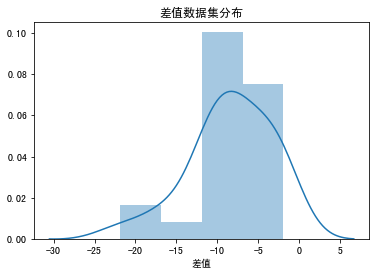

In [11]:
'''
直方图能够粗略估计数据密度，如果想给数据一个更精确的拟合曲线（专业术语叫：核密度估计kernel density estimate (KDE)），
Seaborn 可以很方便的画出直方图和拟合曲线。
查看数据集分布官网教程地址：https://seaborn.pydata.org/tutorial/distributions.html

安装绘图包seaborn：
conda install seaborn
'''
#导入绘图包
import seaborn as sns
#查看数据集分布
sns.distplot(data['差值'])
plt.title('差值数据集分布')
plt.show()

通过观察上面差值数据集分布图，数据集近似正态分布，所以满足t分布的使用条件，我们可以使用相关样本t检验。

### 检验方向

单尾检验（左尾，右尾），还是双尾检验？

因为备选假设是：特鲁普效应确实存在，根据Stroop Effect的定义，颜色和文字不同的情况下，人们的完场测试的时间会变长（ u1 < u2 ）。

所以我们使用单尾检验中的左尾检验，显著水平为5%，t检验的自由度df=n-1=25-1=24

## 2.证据是什么？

在零假设成立前提下，得到样本平均值的概率p是多少？

In [12]:
'''
用python统计包scipy自动计算
用scipy计算出的是：双尾检验
单（1samp）样本t检验（ttest_1samp）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
相关（related）配对t检验（ttest_rel）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
双独立（independent）样本t检验（ttest_ind）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
'''
#导入统计模块（stats）
from scipy import stats

'''
ttest_rel：相关配对检验
返回的第1个值t是假设检验计算出的（t值），
第2个值p是双尾检验的p值
'''
t,p_twoTail = stats.ttest_rel(data['Congruent'],data['Incongruent'])

print('t值=',t,'双尾检验的p值=',p_twoTail) 

t值= -8.088610872807587 双尾检验的p值= 3.548719149724915e-08


In [13]:
'''
因为scipy计算出的是双尾检验的t值和p值，但是我们这里是左尾检验。
根据对称性，双尾的p值是对应单尾p值的2倍
'''
#单尾检验的p值
p_oneTail=p_twoTail/2
print('单尾检验的p值=',p_oneTail)

单尾检验的p值= 1.7743595748624577e-08


## 3.判断标准是什么？

In [14]:
#显著水平使用alpha=5%
alpha=0.05

## 4.做出结论

In [15]:
'''
因为scipy计算出的是双尾检验的t值和p值，但是我们这里是左尾检验。
根据对称性，双尾的p值是对应单尾p值的2倍
左尾判断条件：t < 0 and  p/2 < alpha
右尾判断条件：t > 0 and  p/2 < alpha
'''
#单尾检验的p值
p_oneTail=p_twoTail/2
#显著水平
a=0.05
#决策
if(t<0 and p_oneTail< a):
    print('拒绝零假设，有统计显著')
    print('也就是接受备选假设：特鲁普效应存在')
else:
    print('接受备选假设，没有统计显著，也就是特鲁普效应不存在')

拒绝零假设，有统计显著
也就是接受备选假设：特鲁普效应存在


假设检验报告：

相关配对检验t(24)=-8.08,p=1.77e-08 (α=5%),左尾检验

统计上存在显著差异，拒绝零假设，从而验证斯特鲁普效应存在。

## 5. 置信区间

In [16]:
'''
1）置信水平对应的t值（t_ci）
查t表格可以得到，95%的置信水平对应的t值=2.262
2）计算上下限
置信区间上限a=样本平均值 - t_ci ×标准误差
置信区间下限b=样本平均值 - t_ci ×标准误差
'''

'''
95%的置信水平，自由度是n-1对应的t值
查找t表格获取，
也可以通过这个工具获取：https://www.graphpad.com/quickcalcs/statratio1/（利用这个工具获取t值，需要注意输入的概率值是1-95%=0.05）
注意：课程中这里对应的下面t_ci值有误，以下面的值为准
'''
t_ci=2.064
#差值数据集平均值
sample_mean=data['差值'].mean()
#使用scipy计算标准误差
se=stats.sem(data['差值'])
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se


#标准误差:https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

In [17]:
print('两个平均值差值的置信区间，95置信水平 CI=[%f,%f]' % (a,b))

两个平均值差值的置信区间，95置信水平 CI=[-10.573426,-6.274324]


## 6.效应量

In [18]:
'''
效应量：差异指标Cohen's d
'''
#差值数据集对应的总体平均值是0
pop_mean=0
#差值数据集的标准差
sample_std=data['差值'].std()
d=(sample_mean - pop_mean) / sample_std

print('d=',d)

d= -1.6510807805255563


# 三、数据分析报告总结

1、描述统计分析

第一组样本数据：字体内容和字体颜色一致情况下，平均反应时间是: 13.89 秒,标准差是 3.47 秒

第二组样本数据：字体内容和字体颜色不一致情况下，平均反应时间是: 22.62 秒,标准差是 5.09 秒

“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体验证不一致时，实验者的平均反应时间变长

2、推论统计分析

1）假设检验

相关配对检验t(24)=-8.35,p=7.32e-09 (α=5%),左尾检验

统计上存在显著差异，拒绝零假设，从而验证斯特鲁普效应存在。


2）置信区间

两个平均值差值的置信区间，95%置信水平 CI=[-8.80,-8.67]

3）效应量

d= - 1.67